In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import tqdm
import skimage.io
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

import keras
import glob
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten,
from keras.models import Sequential
from keras.preprocessing import image

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Data Collection and Visualization

In [ ]:
!unzip /content/drive/MyDrive/C-NMC_Leukemia.zip

In [ ]:
train_dataset_all = glob.glob('../content/C-NMC_Leukemia/training_data/C-NMC_train_phase_data/2.all/*.bmp')

train_dataset_hem = glob.glob('../content/C-NMC_Leukemia/training_data/C-NMC_train_phase_data/1.hem/*.bmp')

valid_data = pd.read_csv('/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

In [ ]:
len(train_dataset_all), len(train_dataset_hem)

(7272, 3389)

In [ ]:
A = []
H = []

A = train_dataset_all 
H = train_dataset_hem

100%|██████████| 5/5 [00:00<00:00, 16.97it/s]


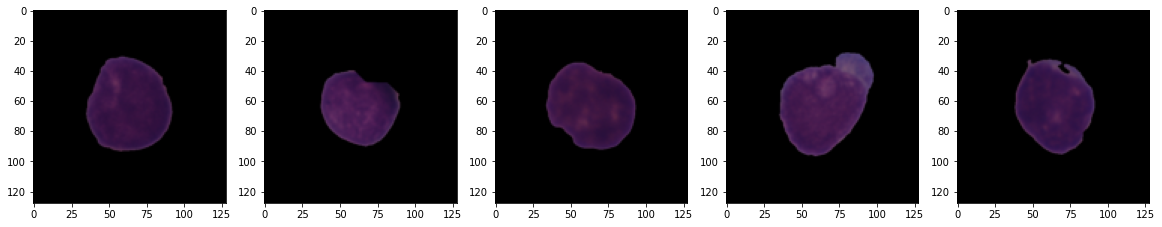

In [ ]:
#Visualising leukemia cells - A

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(A))
    img  = imread(A[rand])
    img  = resize(img, (128,128))
    ax[i].imshow(img)
    ax[i].axis('on')

100%|██████████| 5/5 [00:00<00:00, 25.48it/s]


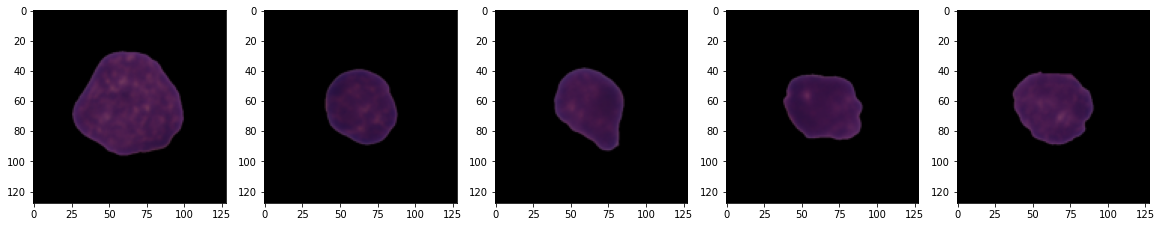

In [ ]:
#Visualising normal cells - H

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(H))
    img  = imread(H[rand])
    img  = resize(img, (128,128))
    ax[i].imshow(img)
    ax[i].axis('on')

In [ ]:
len(valid_data)

1867

In [ ]:
valid_data.head()

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1


In [ ]:
valid_data.labels.value_counts()

1    1219
0     648
Name: labels, dtype: int64

In [ ]:
# Loading validation image

X_val = []

for image_name in valid_data.new_names:
    # Loading images
    img = imread('../content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/' + image_name)
    # Resizing 
    img = resize(img, (256,256))
    # Appending them into list
    X_val.append(img)


In [ ]:
X_val[0].shape

(256, 256, 3)

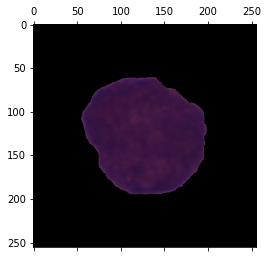

In [ ]:
plt.matshow(X_val[0])